# Experimentacion

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt
import glob, os
import math
import random
from subprocess import Popen, PIPE
import tqdm

In [12]:
executablePath = './../codigo/build/ContarPalabras'
os.chdir("./")
print(executablePath)

datasets = os.listdir("./data/")
print(datasets)
datasets = datasets[1:]
print(datasets)

./../codigo/build/ContarPalabras
['incremental', 'normal.txt', 'uniforme.txt']
['normal.txt', 'uniforme.txt']


    cantThreads                 algorithm      time
0             1   cargarMultiplesArchivos  0.171119
1             1            maximoParalelo  0.041322
2             5   cargarMultiplesArchivos  0.240942
3             5            maximoParalelo  0.111017
4            10   cargarMultiplesArchivos  0.352464
5            10            maximoParalelo  0.198400
6            15   cargarMultiplesArchivos  0.536735
7            15            maximoParalelo  0.301513
8            20   cargarMultiplesArchivos  0.603994
9            20            maximoParalelo  0.450549
10           26   cargarMultiplesArchivos  0.751214
11           26            maximoParalelo  0.659990


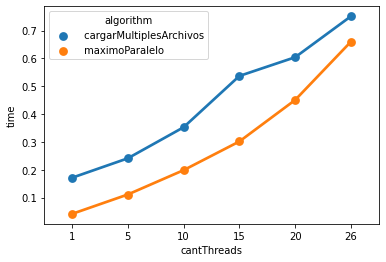

In [59]:
threads = [1,5,10,15,20,26]

columns = ['cantThreads', 'time', 'algorithm']
df = pd.DataFrame(columns = columns)
dataframes = []

for repeat in range(20):
    #create output file
    result = './results/uniforme.csv'
    outputFile = open(results, 'w+')
    outputFile.write("cantThreads,time,algorithm\n")
    
    args = "./data/dataset/uniforme.txt"
    
    for cantThreads in threads:
        command = executablePath + " %s %s %s" % (cantThreads, cantThreads, args)
        p = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
        p.wait()
        
        output=p.stdout.read().decode("utf-8")
        outputFile.write(output)
    
    outputFile.close()
    
    df = pd.read_csv(result, header=[0])
    dataframes.append(df)
    
dfExp = pd.concat(dataframes)
    
result = df.groupby(['cantThreads', 'algorithm']).mean().reset_index()
result['time'] = result['time'].div(1000000)
print(result)

ax= sns.pointplot(data=result, x='cantThreads', y='time',hue="algorithm", ci=None)